<a href="https://colab.research.google.com/github/JuniaBS/Portifolio./blob/main/Turnouver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Análise de Turnover em Empresa Fictícia: Explorando os Fatores de Retenção e Saída de Colaboradores

O turnover, ou rotatividade de colaboradores, é um dos principais desafios enfrentados pelas organizações. Ele pode indicar problemas de clima organizacional, insatisfação, baixa remuneração ou falta de oportunidades de crescimento. Ao mesmo tempo, altos níveis de turnover acarretam custos com desligamentos, admissões e treinamentos, além de impactarem a produtividade.
Neste estudo, utilizei uma base fictícia de Recursos Humanos contendo informações demográficas, profissionais e comportamentais de colaboradores, a fim de identificar padrões relacionados à permanência ou saída da empresa.


##Objetivo
•	Investigar quais fatores estão mais associados à saída de colaboradores.

•	Compreender o perfil típico de quem sai e de quem permanece.

•	Fornecer insights para auxiliar a área de RH na formulação de estratégias de retenção.


In [65]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
# Carregar o conjunto de dados
df_base_rh = pd.read_excel('Base_RH.xlsx')

In [67]:
df_base_rh.head()

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,...,Não,12,1,6,3,Muito bom,2,2,2,2


In [68]:
df_base_rh.columns

Index(['ID', 'Funcionário_deixou_a_empresa', 'Idade', 'Frequência de Viagens',
       'Distância_do_trabalho', 'Formação', 'E-Sat', 'Gênero', 'Estado_Civil',
       'Salário', 'Qte_Empresas_Trabalhadas', 'Faz_hora_extras?',
       'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
       'Horas_de_treinamento', 'Equilibrio_de_Vida', 'Tempo_de_empresa',
       'Anos_no_mesmo_cargo', 'Anos_desde_a_ultima_promocao',
       'Anos_com_o_mesmo_chefe'],
      dtype='object')

In [69]:
df_base_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            1470 non-null   int64 
 1   Funcionário_deixou_a_empresa  1470 non-null   object
 2   Idade                         1470 non-null   int64 
 3   Frequência de Viagens         1470 non-null   object
 4   Distância_do_trabalho         1470 non-null   int64 
 5   Formação                      1470 non-null   object
 6   E-Sat                         1470 non-null   object
 7   Gênero                        1470 non-null   object
 8   Estado_Civil                  1470 non-null   object
 9   Salário                       1470 non-null   int64 
 10  Qte_Empresas_Trabalhadas      1470 non-null   int64 
 11  Faz_hora_extras?              1470 non-null   object
 12  Perc_de_aumento               1470 non-null   int64 
 13  Qte_ações_da_empre

##1. Taxa de turnover geral e por segmento

  Qual a proporção de funcionários que deixaram a empresa?              



In [70]:
# Taxa de turnover geral (%)
turnover_geral = df_base_rh['Funcionário_deixou_a_empresa'].value_counts(normalize=True) * 100
print(turnover_geral)

Funcionário_deixou_a_empresa
Não    83.877551
Sim    16.122449
Name: proportion, dtype: float64


A proporção de funcionários que deixaram a empresa é de 16,12%.

Quais grupos têm maior turnover (por idade, gênero, estado civil, escolaridade etc.)?

In [71]:
# Turnover por Faixa de Idade (%)
# Criar faixas etárias
bins = [18, 25, 35, 45, 55, 65]  # você pode ajustar conforme o perfil dos dados
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df_base_rh['Faixa_Etaria'] = pd.cut(df_base_rh['Idade'], bins=bins, labels=labels, right=True)

# Calcular a taxa de turnover por faixa etária (%)
turnover_por_faixa = df_base_rh.groupby('Faixa_Etaria')['Funcionário_deixou_a_empresa'].value_counts(normalize=True).unstack() * 100

# Exibir a tabela
print(turnover_por_faixa)

Funcionário_deixou_a_empresa        Não        Sim
Faixa_Etaria                                      
18-25                         65.217391  34.782609
26-35                         80.858086  19.141914
36-45                         90.811966   9.188034
46-55                         88.495575  11.504425
56-65                         82.978723  17.021277


<ipython-input-71-2650639191>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  turnover_por_faixa = df_base_rh.groupby('Faixa_Etaria')['Funcionário_deixou_a_empresa'].value_counts(normalize=True).unstack() * 100


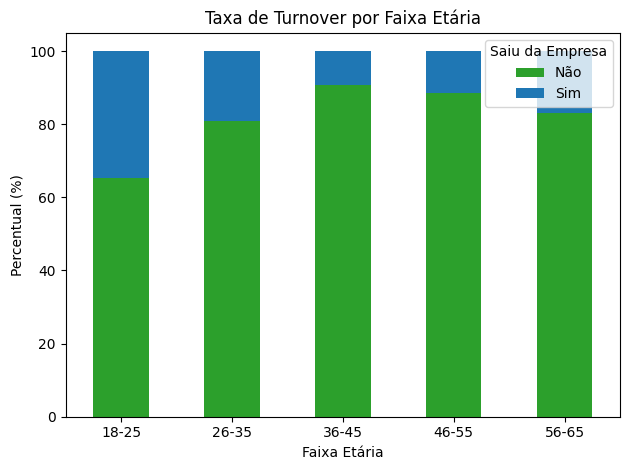

In [72]:
# Resetar o índice para plotar
turnover_por_faixa_plot = turnover_por_faixa.reset_index()

# Gráfico
turnover_por_faixa_plot.plot(x='Faixa_Etaria', kind='bar', stacked=True, color=['#2ca02c', '#1f77b4'])
plt.title("Taxa de Turnover por Faixa Etária")
plt.ylabel("Percentual (%)")
plt.xlabel("Faixa Etária")
plt.legend(title="Saiu da Empresa")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [73]:
# Turnover por gênero (%)
turnover_por_genero = df_base_rh.groupby('Gênero')['Funcionário_deixou_a_empresa'].value_counts(normalize=True).unstack() * 100
print(turnover_por_genero)

Funcionário_deixou_a_empresa        Não        Sim
Gênero                                            
H                             82.993197  17.006803
M                             85.204082  14.795918


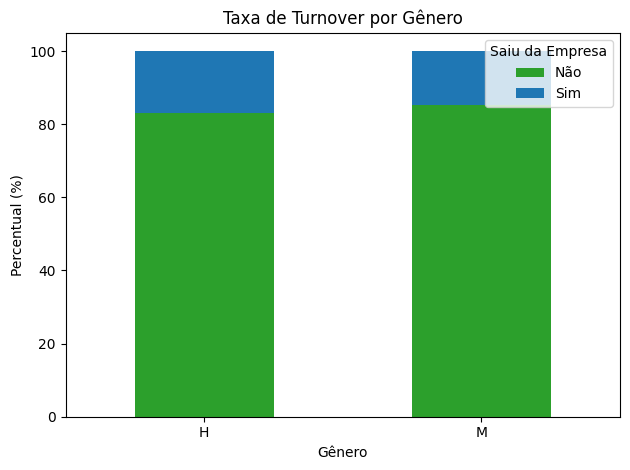

In [74]:
# Recria a tabela para plotar
turnover_por_genero_plot = turnover_por_genero.reset_index()

# Gráfico
turnover_por_genero_plot.plot(x='Gênero', kind='bar', stacked=True, color=['#2ca02c', '#1f77b4'])
plt.title("Taxa de Turnover por Gênero")
plt.ylabel("Percentual (%)")
plt.xlabel("Gênero")
plt.legend(title="Saiu da Empresa", loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [75]:
# Por estado civil
turnover_estado_civil = df_base_rh.groupby('Estado_Civil')['Funcionário_deixou_a_empresa'].value_counts(normalize=True).unstack() * 100
print(turnover_estado_civil)

Funcionário_deixou_a_empresa        Não        Sim
Estado_Civil                                      
Casado                        87.518574  12.481426
Divorciado                    89.908257  10.091743
Solteiro                      74.468085  25.531915


In [76]:
# Por formação
turnover_formacao = df_base_rh.groupby('Formação')['Funcionário_deixou_a_empresa'].value_counts(normalize=True).unstack() * 100
print(turnover_formacao)

Funcionário_deixou_a_empresa        Não        Sim
Formação                                          
Doutorado                     89.583333  10.416667
Ensino Médio                  81.764706  18.235294
Ensino Superior               82.692308  17.307692
Ensino Técnico                84.397163  15.602837
Mestrado                      85.427136  14.572864


##2. Fatores associados ao turnover

•	Funcionários que fazem hora extra têm maior tendência a sair?



In [77]:
# Distribuição de turnover por hora extra (%)
turnover_hora_extra = df_base_rh.groupby('Faz_hora_extras?')['Funcionário_deixou_a_empresa'].value_counts(normalize=True).unstack() * 100
print(turnover_hora_extra)

Funcionário_deixou_a_empresa        Não        Sim
Faz_hora_extras?                                  
Não                           89.563567  10.436433
Sim                           69.471154  30.528846


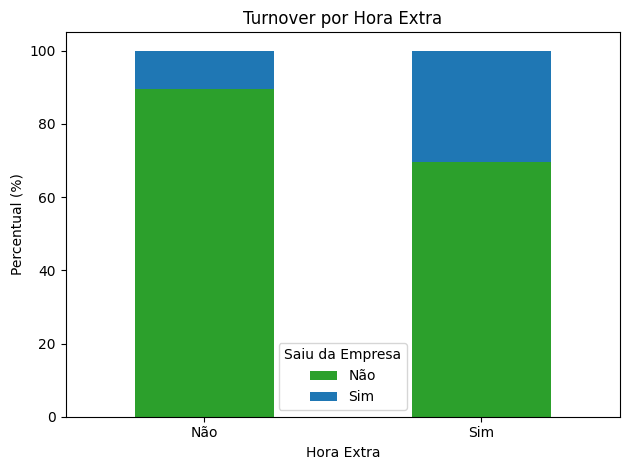

In [78]:
turnover_hora_extra.plot(kind='bar', stacked=True, color=['#2ca02c', '#1f77b4'])
plt.title("Turnover por Hora Extra")
plt.ylabel("Percentual (%)")
plt.xlabel("Hora Extra")
plt.legend(title='Saiu da Empresa')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

• Existe relação entre tempo de empresa e turnover?

<ipython-input-79-1178221838>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_base_rh, x='Funcionário_deixou_a_empresa', y='Tempo_de_empresa', palette={"Sim": "#1f77b4", "Não": "#2ca02c"})


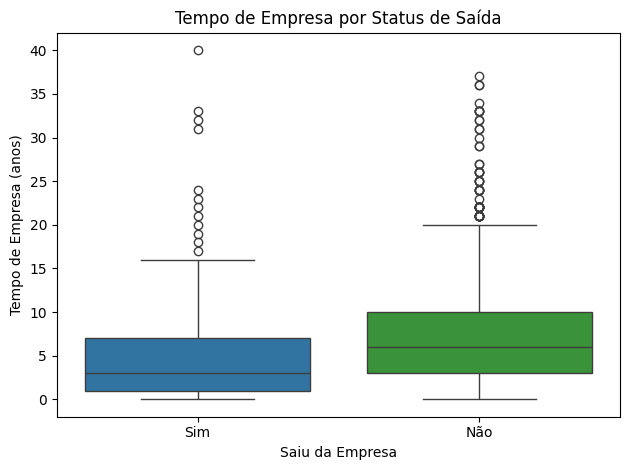

In [79]:
# Boxplot comparando tempo de empresa
sns.boxplot(data=df_base_rh, x='Funcionário_deixou_a_empresa', y='Tempo_de_empresa', palette={"Sim": "#1f77b4", "Não": "#2ca02c"})
plt.title("Tempo de Empresa por Status de Saída")
plt.xlabel("Saiu da Empresa")
plt.ylabel("Tempo de Empresa (anos)")
plt.tight_layout()
plt.show()

In [80]:
# Cálculo do IQR
Q1 = df_base_rh['Tempo_de_empresa'].quantile(0.25)
Q3 = df_base_rh['Tempo_de_empresa'].quantile(0.75)
IQR = Q3 - Q1

# Limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os outliers
outliers = df_base_rh[(df_base_rh['Tempo_de_empresa'] < limite_inferior) |
                      (df_base_rh['Tempo_de_empresa'] > limite_superior)]

print(f"Total de outliers: {outliers.shape[0]}")
display(outliers[['Tempo_de_empresa', 'Funcionário_deixou_a_empresa']].sort_values(by='Tempo_de_empresa', ascending=False))


Total de outliers: 104


,Tempo_de_empresa,Funcionário_deixou_a_empresa
126,40,Sim
98,37,Não
270,36,Não
1116,36,Não
561,34,Não
...,...,...
784,19,Não
976,19,Não
975,19,Sim
1327,19,Não


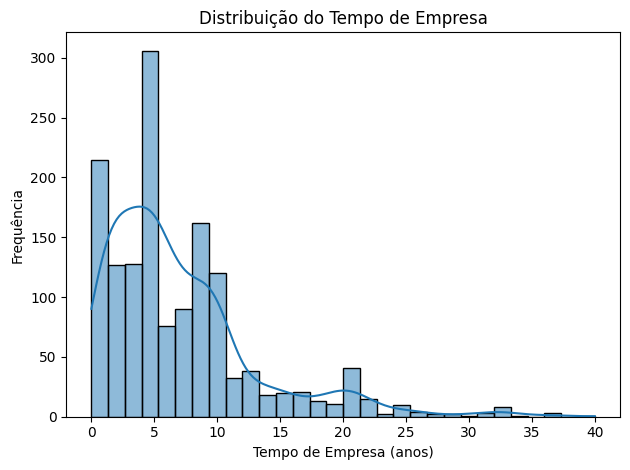

In [81]:
sns.histplot(df_base_rh['Tempo_de_empresa'], bins=30, kde=True)
plt.title("Distribuição do Tempo de Empresa")
plt.xlabel("Tempo de Empresa (anos)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


In [82]:
outliers_extremos = df_base_rh[df_base_rh['Tempo_de_empresa'] > 25]
display(outliers_extremos[['Tempo_de_empresa', 'Funcionário_deixou_a_empresa']].sort_values(by='Tempo_de_empresa', ascending=False))


,Tempo_de_empresa,Funcionário_deixou_a_empresa
126,40,Sim
98,37,Não
270,36,Não
1116,36,Não
561,34,Não
1111,33,Sim
914,33,Não
237,33,Não
190,33,Não
962,33,Não


<ipython-input-83-1520614737>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_base_rh, x='Funcionário_deixou_a_empresa', y='Tempo_log', palette={"Sim": "#1f77b4", "Não": "#2ca02c"})


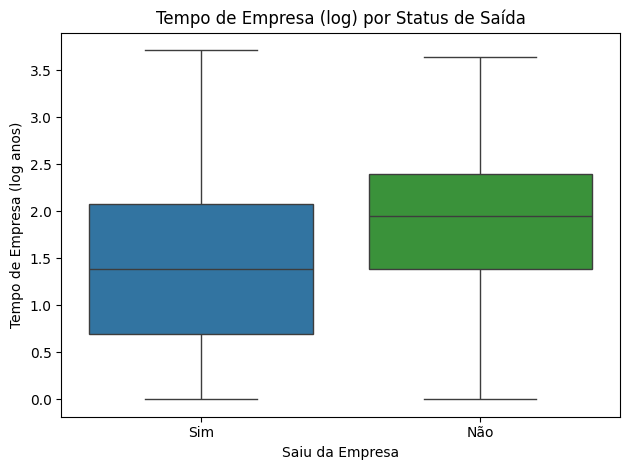

In [83]:
# Criar coluna transformada
df_base_rh['Tempo_log'] = np.log1p(df_base_rh['Tempo_de_empresa'])

# Novo boxplot com escala log
sns.boxplot(data=df_base_rh, x='Funcionário_deixou_a_empresa', y='Tempo_log', palette={"Sim": "#1f77b4", "Não": "#2ca02c"})
plt.title("Tempo de Empresa (log) por Status de Saída")
plt.xlabel("Saiu da Empresa")
plt.ylabel("Tempo de Empresa (log anos)")
plt.tight_layout()
plt.show()


• Qual a influência de aumento salarial, promoções ou ações na empresa?

In [84]:
# Médias por status de saída
medias = df_base_rh.groupby('Funcionário_deixou_a_empresa')[['Perc_de_aumento', 'Anos_desde_a_ultima_promocao', 'Qte_ações_da_empresa']].mean()
print(medias)

                              Perc_de_aumento  Anos_desde_a_ultima_promocao  \
Funcionário_deixou_a_empresa                                                  
Não                                 15.231144                      2.234388   
Sim                                 15.097046                      1.945148   

                              Qte_ações_da_empresa  
Funcionário_deixou_a_empresa                        
Não                                       0.845093  
Sim                                       0.527426  


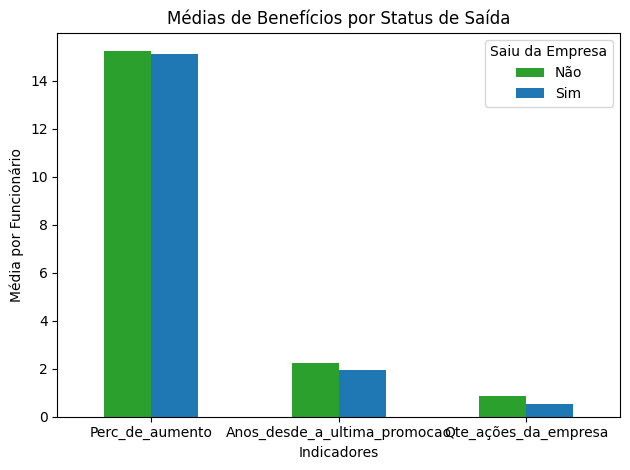

In [85]:
medias.T.plot(kind='bar', color=["#2ca02c", "#1f77b4"])
plt.title("Médias de Benefícios por Status de Saída")
plt.ylabel("Média por Funcionário")
plt.xlabel("Indicadores")
plt.legend(title='Saiu da Empresa')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

3. Perfil dos que permanecem vs. saem

•	Qual o perfil típico de quem deixou a empresa?

In [86]:
perfil_saiu = df_base_rh[df_base_rh['Funcionário_deixou_a_empresa'] == 'Sim'].describe(include='all')
display(perfil_saiu)

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe,Faixa_Etaria,Tempo_log
count,237.000000,237,237.000000,237,237.000000,237,237,237,237,237.000000,...,237.000000,237.000000,237.000000,237,237.000000,237.000000,237.000000,237.000000,233,237.000000
unique,NaN,1,NaN,3,NaN,5,4,2,3,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,5,NaN
top,NaN,Sim,NaN,Viaja raramente,NaN,Ensino Superior,Baixo,H,Solteiro,NaN,...,NaN,NaN,NaN,Muito bom,NaN,NaN,NaN,NaN,26-35,NaN
freq,NaN,237,NaN,156,NaN,99,72,150,120,NaN,...,NaN,NaN,NaN,127,NaN,NaN,NaN,NaN,116,NaN
mean,725.464135,NaN,33.607595,NaN,10.632911,NaN,NaN,NaN,NaN,4787.092827,...,0.527426,8.244726,2.624473,NaN,5.130802,2.902954,1.945148,2.852321,NaN,1.469223
std,409.742866,NaN,9.689350,NaN,8.452525,NaN,NaN,NaN,NaN,3640.210367,...,0.856361,7.169204,1.254784,NaN,5.949984,3.174827,3.153077,3.143349,NaN,0.817338
min,1.000000,NaN,18.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1009.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,386.000000,NaN,28.000000,NaN,3.000000,NaN,NaN,NaN,NaN,2373.000000,...,0.000000,3.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.693147
50%,733.000000,NaN,32.000000,NaN,9.000000,NaN,NaN,NaN,NaN,3202.000000,...,0.000000,7.000000,2.000000,NaN,3.000000,2.000000,1.000000,2.000000,NaN,1.386294
75%,1057.000000,NaN,39.000000,NaN,17.000000,NaN,NaN,NaN,NaN,5916.000000,...,1.000000,10.000000,3.000000,NaN,7.000000,4.000000,2.000000,5.000000,NaN,2.079442


•	Há padrões em comum entre os que ficam?

In [87]:
perfil_ficou = df_base_rh[df_base_rh['Funcionário_deixou_a_empresa'] == 'Não'].describe(include='all')
display(perfil_ficou)

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe,Faixa_Etaria,Tempo_log
count,1233.000000,1233,1233.000000,1233,1233.000000,1233,1233,1233,1233,1233.000000,...,1233.000000,1233.000000,1233.000000,1233,1233.000000,1233.000000,1233.000000,1233.000000,1229,1233.000000
unique,NaN,1,NaN,3,NaN,5,4,2,3,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,5,NaN
top,NaN,Não,NaN,Viaja raramente,NaN,Ensino Superior,Alto,H,Casado,NaN,...,NaN,NaN,NaN,Muito bom,NaN,NaN,NaN,NaN,26-35,NaN
freq,NaN,1233,NaN,887,NaN,473,391,732,589,NaN,...,NaN,NaN,NaN,766,NaN,NaN,NaN,NaN,490,NaN
mean,737.429035,NaN,37.561233,NaN,8.915653,NaN,NaN,NaN,NaN,6832.739659,...,0.845093,11.862936,2.832928,NaN,7.369019,4.484185,2.234388,4.367397,NaN,1.877564
std,427.408962,NaN,8.888360,NaN,8.012633,NaN,NaN,NaN,NaN,4818.208001,...,0.841985,7.760719,1.293585,NaN,6.096298,3.649402,3.234762,3.594116,NaN,0.726759
min,2.000000,NaN,18.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1051.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,362.000000,NaN,31.000000,NaN,2.000000,NaN,NaN,NaN,NaN,3211.000000,...,0.000000,6.000000,2.000000,NaN,3.000000,2.000000,0.000000,2.000000,NaN,1.386294
50%,736.000000,NaN,36.000000,NaN,7.000000,NaN,NaN,NaN,NaN,5204.000000,...,1.000000,10.000000,3.000000,NaN,6.000000,3.000000,1.000000,3.000000,NaN,1.945910
75%,1114.000000,NaN,43.000000,NaN,13.000000,NaN,NaN,NaN,NaN,8834.000000,...,1.000000,16.000000,3.000000,NaN,10.000000,7.000000,3.000000,7.000000,NaN,2.397895


Comparando os dois blocos acima (quem saiu vs. quem ficou), foram gerados insights como:

"Funcionários que ficam tendem a ter maior tempo de empresa, menos histórico de outras empresas e menor frequência de hora extra".

"Quem sai tem menor tempo de empresa, mais histórico de troca de empregos e menor equilíbrio de vida."

4. Análise de satisfação e equilíbrio de vida

•	Pessoas com menor equilíbrio de vida tendem a sair mais?

In [88]:
# Map 'Equilibrio_de_Vida' to numerical values
equilibrio_mapping = {
    'Ruim': 1,
    'Bom': 2,
    'Muito bom': 3,
    'Excelente': 4
}
df_base_rh['Equilibrio_de_Vida_Numerico'] = df_base_rh['Equilibrio_de_Vida'].map(equilibrio_mapping)

# Calculate the mean of the numerical 'Equilibrio_de_Vida' by 'Funcionário_deixou_a_empresa'
mean_equilibrio = df_base_rh.groupby('Funcionário_deixou_a_empresa')['Equilibrio_de_Vida_Numerico'].mean()

display(mean_equilibrio)

,Equilibrio_de_Vida_Numerico
Funcionário_deixou_a_empresa,
Não,2.781022
Sim,2.658228


•	Existe relação entre a satisfação (E-Sat) e turnover?

<ipython-input-89-1142648546>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_base_rh, x='Funcionário_deixou_a_empresa', y='E-Sat', palette={"Sim": "#1f77b4", "Não": "#2ca02c"})


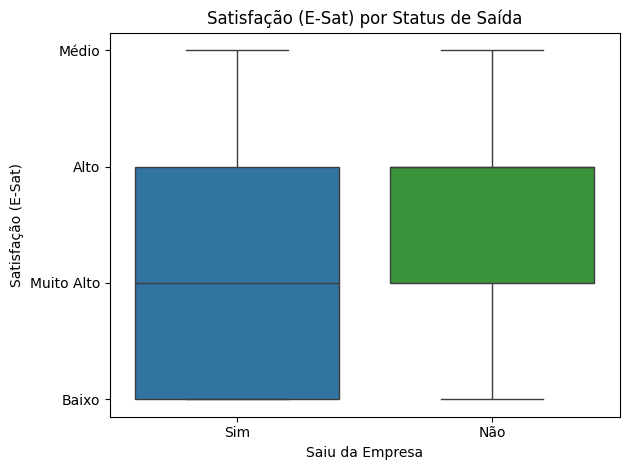

,E-Sat_Numerico
Funcionário_deixou_a_empresa,
Não,2.771290
Sim,2.464135


In [89]:
# Map 'E-Sat' to numerical values
esat_mapping = {
    'Baixo': 1,
    'Médio': 2,
    'Alto': 3,
    'Muito Alto': 4
}
df_base_rh['E-Sat_Numerico'] = df_base_rh['E-Sat'].map(esat_mapping)

# Create the boxplot (this part should work with categorical data)
sns.boxplot(data=df_base_rh, x='Funcionário_deixou_a_empresa', y='E-Sat', palette={"Sim": "#1f77b4", "Não": "#2ca02c"})
plt.title("Satisfação (E-Sat) por Status de Saída")
plt.xlabel("Saiu da Empresa")
plt.ylabel("Satisfação (E-Sat)")
plt.tight_layout()
plt.show()

# Calculate the mean of the numerical 'E-Sat' by 'Funcionário_deixou_a_empresa'
mean_esat = df_base_rh.groupby('Funcionário_deixou_a_empresa')['E-Sat_Numerico'].mean()

display(mean_esat)

##5. Diferença salarial e formação

O turnover é maior em faixas salariais mais baixas?

<ipython-input-90-2799857789>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  turnover_salario = df_base_rh.groupby('Faixa_Salarial')['Funcionário_deixou_a_empresa'].value_counts(normalize=True).unstack() * 100


Funcionário_deixou_a_empresa        Não        Sim
Faixa_Salarial                                    
Até 2,5k                      65.929204  34.070796
2,5k-5k                       83.556405  16.443595
5k-7,5k                       90.322581   9.677419
7,5k-10k                      85.384615  14.615385
Acima de 10k                  91.103203   8.896797


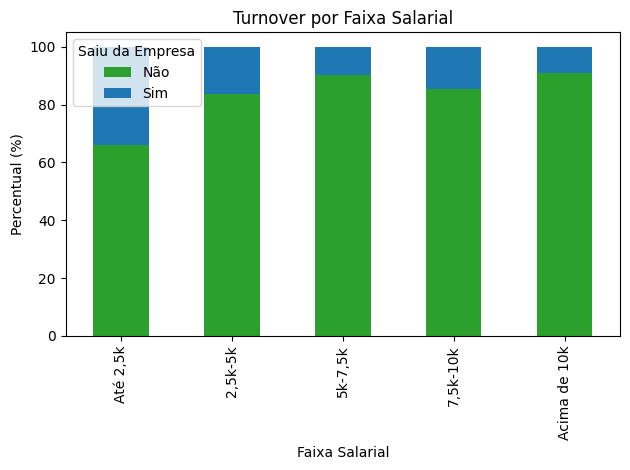

In [90]:
bins_salario = [0, 2500, 5000, 7500, 10000, df_base_rh['Salário'].max()]
labels_salario = ['Até 2,5k', '2,5k-5k', '5k-7,5k', '7,5k-10k', 'Acima de 10k']

df_base_rh['Faixa_Salarial'] = pd.cut(df_base_rh['Salário'], bins=bins_salario, labels=labels_salario)

# Taxa de turnover por faixa salarial
turnover_salario = df_base_rh.groupby('Faixa_Salarial')['Funcionário_deixou_a_empresa'].value_counts(normalize=True).unstack() * 100
print(turnover_salario)

# Gráfico
turnover_salario.plot(kind='bar', stacked=True, color=['#2ca02c', '#1f77b4'])
plt.title("Turnover por Faixa Salarial")
plt.ylabel("Percentual (%)")
plt.xlabel("Faixa Salarial")
plt.legend(title='Saiu da Empresa')
plt.tight_layout()
plt.show()

•	A formação (ensino médio, técnico, mestrado) influencia na permanência?

In [91]:
turnover_formacao = df_base_rh.groupby('Formação')['Funcionário_deixou_a_empresa'].value_counts(normalize=True).unstack() * 100
print(turnover_formacao)


Funcionário_deixou_a_empresa        Não        Sim
Formação                                          
Doutorado                     89.583333  10.416667
Ensino Médio                  81.764706  18.235294
Ensino Superior               82.692308  17.307692
Ensino Técnico                84.397163  15.602837
Mestrado                      85.427136  14.572864


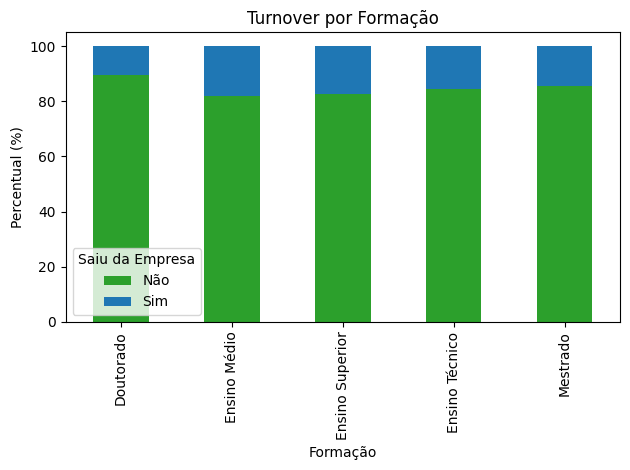

In [92]:
turnover_formacao.plot(kind='bar', stacked=True, color=['#2ca02c', '#1f77b4'])
plt.title("Turnover por Formação")
plt.ylabel("Percentual (%)")
plt.xlabel("Formação")
plt.legend(title='Saiu da Empresa')
plt.tight_layout()
plt.show()


##5. Conclusão
A análise revelou que fatores como baixa satisfação, pouco equilíbrio entre vida pessoal e profissional, menor tempo de empresa, ausência de promoção recente e salário mais baixo estão relacionados à maior probabilidade de saída dos colaboradores.

Esses insights podem apoiar decisões estratégicas na área de RH, como:

•	Investir em programas de bem-estar e qualidade de vida;

•	Reavaliar a política de horas extras;

•	Estimular planos de carreira e promoções;

•	Avaliar o impacto da remuneração e formação na retenção.
